In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel("Advertising.xlsx")
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Preprocesamiento de los datos

In [3]:
data.isnull().sum() #missing values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [4]:

conditionlist = [
    (data['sales'] >15), #0-25
    (data['sales'] <15)]#76-100
choicelist = [1, 0]
data['sales'] = np.select(conditionlist, choicelist, default=0)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,1
1,44.5,39.3,45.1,0
2,17.2,45.9,69.3,0
3,151.5,41.3,58.5,1
4,180.8,10.8,58.4,0
...,...,...,...,...
195,38.2,3.7,13.8,0
196,94.2,4.9,8.1,0
197,177.0,9.3,6.4,0
198,283.6,42.0,66.2,1


In [5]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,1
1,44.5,39.3,45.1,0
2,17.2,45.9,69.3,0
3,151.5,41.3,58.5,1
4,180.8,10.8,58.4,0
...,...,...,...,...
195,38.2,3.7,13.8,0
196,94.2,4.9,8.1,0
197,177.0,9.3,6.4,0
198,283.6,42.0,66.2,1


# 1. Desarrollar un modelo de regresión logística. Justificar y explicar alguna de las relaciones interesantes que puedas encontrar.

In [6]:
#Convertimos todo el dataframe en int dado que los nuevos valores de quality son float y logistic regression no admite valores float
data = data.applymap(int)

In [7]:
#Preparamos los datos para el entrenamiento
x = data.drop('sales',axis=1)
y = data['sales']

VARIABLE:  TV
Coeficiente de pearson (R): 0.6045558635051187
Coeficiente de determinacion (R^2): 0.785
El error del modelo es (RMSE):  0.31622776601683794


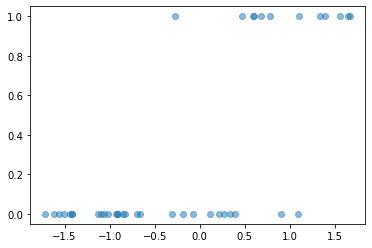

VARIABLE:  radio
Coeficiente de pearson (R): 0.5641064674800452
Coeficiente de determinacion (R^2): 0.755
El error del modelo es (RMSE):  0.5244044240850758


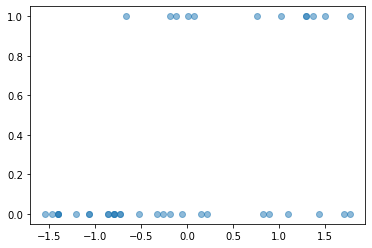

VARIABLE:  newspaper
Coeficiente de pearson (R): 0.1957174446714489
Coeficiente de determinacion (R^2): 0.66
El error del modelo es (RMSE):  0.570087712549569


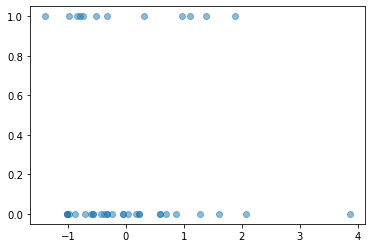

In [8]:
#Utilizamos funcion similar al aplicado en el ejercicio anterior.
#Creamos un dataframe donde guardaremos los valores de las regresiones respecto de una misma variable para compararlas mas tarde
dataframe = pd.DataFrame(columns=['variable','target','r','R^2','RMSE'])
for var in x.columns:
    x = data[[var]]
    y = data['sales']
    # Estandarizamos los datos pero no el target
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    #Creamos los datos con de entrenamiento y el test
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    #Regresion de cada variable junto con el target
    modelo = LogisticRegression()
    modelo.fit(x_train,y_train)
    prediccion = modelo.predict(x_test)
    #Datos caracteristicos del modelo
    #RMSE
    error=np.sqrt(metrics.mean_squared_error(y_test,prediccion))
    #Coeficiente de determinacion
    coefdeter = modelo.score(x,y)
    #Coeficiente de correlacion o de pearson
    r = np.corrcoef(data[var], data['sales'])[1][0]
    #Prints
    print('VARIABLE: ',var)
    print("Coeficiente de pearson (R):",r)
    print("Coeficiente de determinacion (R^2):",coefdeter)
    print("El error del modelo es (RMSE): ", error)
    #Guardado de los datos en dataframe para su comparacion
    dataframe = dataframe.append({'variable': var, 
                                    'target' : 'sales',
                                    'r': r,
                                     'R^2':coefdeter,
                                     'RMSE':error}, ignore_index=True)
    #plot
    plt.scatter(x_test, y_test,alpha=0.5)

    plt.show()



In [9]:
dataframe

,variable,target,r,R^2,RMSE
0,TV,sales,0.604556,0.785,0.316228
1,radio,sales,0.564106,0.755,0.524404
2,newspaper,sales,0.195717,0.660,0.570088


In [10]:
dataframe.sort_values(by='r',ascending=False)

,variable,target,r,R^2,RMSE
0,TV,sales,0.604556,0.785,0.316228
1,radio,sales,0.564106,0.755,0.524404
2,newspaper,sales,0.195717,0.660,0.570088


Podemos ver que a mas coeficiende de Pearson (r) mas bondad del ajuste dado que aumenta el coeficiente de determinacion y menos RMSE, es decir, menor error cuadratico medio.

Podemos ver como las ventas estan muy relacionadas con la radio pero menos con la tele y aun menos con el periodico, una cosa que considero que es bastante raro dado que pienso que actualmente la gente suele hacer mucho mas uso de la television que de la radio.
Lo mismo ocurre con el periodico pienso que actualmente a pesar que en distinto formato, es decir, ahora en formato electronico pienso que se usa mas periodico que la radio.

# 2. Si se analizan los beneficios obtenidos al llevar a cabo dos anuncios publicitarios, cuyos beneficios obtenidos en TV son de 130, cuyas inversiones en radio no se tienen en cuenta, y cuya inversión en periódicos, en un caso son significativos, y en el otro no. ¿Cuándo existe una mayor probabilidad de obtener beneficios en dichos anuncios?.

Modelo de regresion logistica de todo el dataframe

Como se nos pide que anuncio tiene mas probabilidad, es decir, el primero o el segundo. 0 o 1 
Quiere decir que transformemos los datos a binario y realicemos una regresion.

### Preprocesamiento de los datos. Transformacion del dataset a binario

In [11]:
descr=data.describe()# para crear dichas clases dividiremos segun los cuartiles
descr

,TV,radio,newspaper,sales
count,200.000000,200.00000,200.000000,200.000000
mean,146.570000,22.79000,30.100000,0.375000
std,85.824731,14.82582,21.769233,0.485338
min,0.000000,0.00000,0.000000,0.000000
25%,73.750000,9.75000,12.000000,0.000000
50%,149.000000,22.50000,25.000000,0.000000
75%,218.250000,36.00000,45.000000,1.000000
max,296.000000,49.00000,114.000000,1.000000


In [12]:
dataorig=data.copy()#copia del dataset para realizar dos comparaciones

In [13]:
#Transformamos el dataset en binario
#Dividimos el dataset en 2 partes 0 o 1, dependiendo si el numero correspondiente supere o no el 50% de
#los valores de dicha columna
for var in data.columns:
    conditionlist = [
        (data[var] >= descr[var]['min']) & (data[var] <=descr[var]['50%']), #0-25
        (data[var] > descr[var]['50%']) & (data[var] <=descr[var]['max'])]#76-100
    choicelist = [0, 1]
    data[var] = np.select(conditionlist, choicelist, default='Not Specified')
data

,TV,radio,newspaper,sales
0,1,1,1,1
1,0,1,1,0
2,0,1,1,0
3,1,1,1,1
4,1,0,1,0
...,...,...,...,...
195,0,0,0,0
196,0,0,0,0
197,1,0,0,0
198,1,1,1,1


Dado que los beneficios en TV son 130 en dos anuncios asumimos que es la mitad cada uno, las inversiones en radio no se tienen en cuenta, y la inversion en periodicos en un caso no se tiene en cuenta y en el otro es significativo, para este dato significativo asumimos que es el maximo valor que se tiene en el dataset.

In [14]:
#Creacion del dataframe con los datos que se nos proporcionan en el enunciado
test = pd.DataFrame(data={'TV': [65, 65], 'radio': [0, 0],'newspaper':[1, 0]})
test

,TV,radio,newspaper
0,65,0,1
1,65,0,0


In [15]:
descr['TV']['50%']

149.0

Como el 50% corresponde con el numero 216, es decir, el beneficio de la TV es inferior a dicho numero se interpretara como un 0.

In [16]:
#Nuevo dataset en binario
test = pd.DataFrame(data={'TV': [0, 0], 'radio': [0, 0],'newspaper':[1, 0]})
test

,TV,radio,newspaper
0,0,0,1
1,0,0,0


In [17]:
#Preparacion de los datos para el entrenamiento
x = data.drop('sales',axis=1)
y = data['sales']
# Estandarizamos los datos pero no el target
scaler = StandardScaler()
x = scaler.fit_transform(x)
#Creamos los datos con de entrenamiento y el test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#Regresion de cada variable junto con el target quality
modelo = LogisticRegression()
modelo.fit(x_train,y_train)

LogisticRegression()

In [18]:
modelo.predict(test)# clase predicha por el modelo con el rango de division siendo el 50%

array(['0', '0'], dtype=object)

Respecto a la pregunta ¿Cuándo existe una mayor probabilidad de obtener beneficios en dichos anuncios? entiendo que se refiere a con que anuncio se tendra mas probabilidad de ganar dinero y en este caso como se puede ver el modelo dice que no se ganara dinero con ningun anuncio.

In [19]:
#Transformamos el dataset en binario
#Dividimos el dataset en 2 partes 0 o 1, dependiendo si el numero correspondiente supere o no el 25% de
#los valores de dicha columna.
for var in data.columns:
    conditionlist = [
        (dataorig[var] >= descr[var]['min']) & (dataorig[var] <=descr[var]['25%']), #0-25
        (dataorig[var] > descr[var]['25%']) & (dataorig[var] <=descr[var]['max'])]#76-100
    choicelist = [0, 1]
    dataorig[var] = np.select(conditionlist, choicelist, default='Not Specified')
dataorig

,TV,radio,newspaper,sales
0,1,1,1,1
1,0,1,1,0
2,0,1,1,0
3,1,1,1,1
4,1,1,1,0
...,...,...,...,...
195,0,0,1,0
196,1,0,0,0
197,1,0,0,0
198,1,1,1,1


In [20]:
#Preparacion de los datos para el entrenamiento
x = dataorig.drop('sales',axis=1)
y = dataorig['sales']
# Estandarizamos los datos pero no el target
scaler = StandardScaler()
x = scaler.fit_transform(x)
#Creamos los datos con de entrenamiento y el test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#Regresion de todo el dataset respecto a la variable target
modelo = LogisticRegression()
modelo.fit(x_train,y_train)
print(modelo.intercept_)
print(modelo.coef_)

[-1.41865448]
[[1.85258898 1.92250963 0.15848936]]


In [21]:
modelo.predict(test)# # clase predicha por el modelo con el rango de division siendo el 25%

array(['0', '0'], dtype=object)

Como podemos ver ahora al bajar el rango en el que se sustituye los valores reales por 1 y 0 para que tenga mas probabilidad de que sea 1 la clase predicha por el modelo ahora si que es 1, es decir, se van a realizar ventas. 

In [22]:
test

,TV,radio,newspaper
0,0,0,1
1,0,0,0


Pero en el caso de aun asi querer responder a la pregunta de que anuncio es mas probable que tengas ventas se escogeria el primero dado que este tiene una venta en cuanto al newspaper mientras que el segundo anuncio no tiene ningun tipo de venta independientemente del medio de comunicacion.

# Referencias
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py